# Исследование сервиса аренды самокатов #

В нашем распоряжении есть данные о пользователях разных городов сервиса аренды самокатов "GoFast".
Необходимо провести исследование данных и проверить несколько гипотез.

**Цель работы:**
Проверить сформулированные гипотезы для дальнейшей работы и развития сервиса аренды самокатов. 

**Задачи работы:**
1. Подтвердить гипотезу о том, что пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки
2. Проверить, что среднее расстояние, которое проезжают пользователи, не превышает 3130 метров
3. Проверить, что помесячная выручка от пользователей с подпиской больше, чем от пользователей без подписки
4. Проверить, снизилось ли количество обращений в техподдержку после обновления серверов мобильного приложения
5. Выяснить, сколько промокодов на подписку нужно разослать пользователям, чтобы вероятность не выполнить план была не более 5%
6. Оценить вероятность того, что разосланные в мобильном приложении push-уведомления откроют не более 399,5 тыс пользователей


**План работы:**
1. Загрузка данных, изучение первичной информации
2. Предобработка данных:
   - 2.1. Изменение типа данных столбца date
   - 2.2. Добавление столбца с номером месяца в df 'rides'
   - 2.3. Проверка на пропуски
   - 2.4. Проверка на дубликаты
3. Исследовательский анализ данных:
    - 3.1. Работа со столбцом 'city'
    - 3.2. Распределение пользователей по наличию подписки
    - 3.3. Распределение пользователей по возрасту
    - 3.4. Расстояния, которые пользователь преодолел за одну поездку
    - 3.5. Продолжительность поездок
4. Объединение таблиц
    - 4.1. Создание общей таблицы на основе таблиц users и rides
    - 4.2. Создание таблицы по пользователям с подпиской. Изучение данных столбцов distance и duration
    - 4.3. Создание таблицы по пользователям без подписки. Изучение данных столбцов distance и duration
5. Подсчет выручки
     - 5.1. Создание сводной таблицы по пользователям с подпиской
     - 5.2. Создание сводной таблицы по пользователям без подписки
6. Проверка гипотез
     - 6.1. Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки
     - 6.2. Проверить, что среднее расстояние, которое проезжают пользователи с подпиской, не превышает 3130 метров
     - 6.3. Проверить, что помесячная выручка от пользователей с подпиской больше, чем от пользователей без подписки
     - 6.4. Проверить, снизилось ли количество обращений в техподдержку после обновления серверов мобильного приложения
7. Распределения
      - 7.1. Выяснить, сколько промокодов на подписку нужно разослать пользователям, чтобы вероятность не выполнить план была не более 5%
      - 7.2. Оценить вероятность того, что разосланные в мобильном приложении push-уведомления откроют не более 399,5 тыс пользователей




## 1. Загрузка данных и изучение первичной информации ##

In [1]:
#импортируем необходимые для работы библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
#откроем файл users_go с данными и выведем первые 10 строк таблицы
try:
    users = pd.read_csv('/datasets/users_go.csv', sep = ',')
except:
     users = pd.read_csv('users_go.csv', sep = ',')
users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


В файле users 5 колонок и 1565 строк, пропущенных значений нет.

Столбцы:
  - user_id - уникальный идентификатор пользователя
  - name - имя пользователя
  -age - возраст
  -city - город
  -subscription_type - тип подписки (free, ultra)

In [4]:
#откроем файл rides_go с данными и выведем первые 10 строк таблицы
try:
    rides = pd.read_csv('/datasets/rides_go.csv', sep = ',', parse_dates = ['date'], dayfirst = True)
except:
     rides = pd.read_csv('rides_go.csv', sep = ',', parse_dates = ['date'], dayfirst = True)
rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [5]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


В файле rides_go 18068 строк и 4 столбца. Пропущенных значений нет.

Столбцы:

   - user_id - уникальный идентификатор пользователя
   - distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)
   - duration - продолжительность сессии (в минутах) 
   - date - дата совершения поездки

In [6]:
#откроем файл subscriptions_go с данными и выведем первые 10 строк таблицы
try:
    subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
except:
     subscriptions = pd.read_csv('subscriptions_go.csv')
subscriptions

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [7]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


В файле subscriptions_go всего 2 строки и 4 столбца. Пропущенных значений так же нет

Столбцы:

   - subscription_type - тип подписки
   - minute_price - стоимость одной минуты поездки по данной подписке
   - start_ride_price - стоимость начала поездки
   - subscription_fee - стоимость ежемесячного платежа

## 2. Предобработка данных. ##

### 2.1. Изменение типа данных столбца date ###




### 2.2. Добавим столбец с номером месяца в таблицу 'rides'

In [8]:
#добавим столбец с месяцем 
rides['month'] = pd.DatetimeIndex(rides['date']).month
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


### 2.3 Проверка таблиц на пропуски

In [9]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [10]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [11]:
subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Во всех трех таблицах пропущенных значений нет. Данные представлены в полном объеме.

### 2.4. Проверка таблиц на дубликаты
    
  * Поиск явных дубликатов 

In [12]:
users.duplicated().sum()

31

В таблице 'users' 31 дублирующаяся строка. Удалим эти строки.

In [13]:
# Проверим сначала размер таблицы
users.shape

(1565, 5)

In [14]:
users = users.drop_duplicates()


In [15]:
users.shape

(1534, 5)

Удалили ровно 31 строку - дубликат.

In [16]:
rides.duplicated().sum()

0

В таблице 'rides' явных дубликатов нет.

   * Поиск неявных дубликатов:
   
Перейдем к поиску неяных дубликатов. Проверим столбец 'city' из df 'users'

In [17]:
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Столбец 'city' в порядке, неявных дубликатов нет

В ходе предварительной подготовки данных к работе были выполнены следующие шаги:

     -  Формат столбца "date" преобразован в формат даты
     -  Проведена проверка на дубликаты (явные и неявные), удалена 31 строка с явными дубликатами.

Данные готовы к исследовательскому анализу

## 3. Исследовательский анализ данных

### 3.1. Изучение столбца 'city'

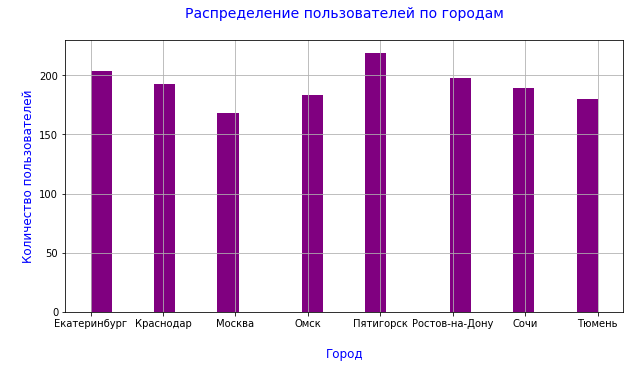

In [18]:
users['city'].sort_values().hist(
    bins = 24,
    grid = True,
    figsize = (10, 5),
    color = 'purple'
)
plt.xlabel('\n'+'Город', color = 'blue', fontsize = 12)
plt.ylabel('\n'+'Количество пользователей', color = 'blue', fontsize = 12)
plt.title('Распределение пользователей по городам' +'\n', color = 'blue', fontsize = 14);

В нашей выборке представлено восемь городов. Пользователи из всех городов распределены достаточно равномерно, без перекосов в сторону какого-либо города. По графику видно, что в выборке преобладают пользователи из Пятигорска, за ним Екатеринбург и Ростов-на-Дону. Меньше всего в выборке представителей Москвы.

In [19]:
users['city'].value_counts().to_frame()

,city
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


### 3.2. Соотношение числа пользователей с подпиской и без

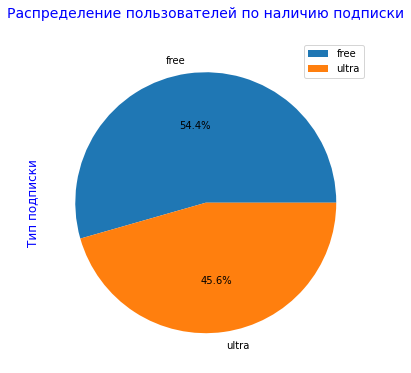

In [20]:
users['subscription_type'].value_counts().plot(
    kind = 'pie',
    legend = True,
    autopct='%1.1f%%',
    figsize = (6,6)
)
plt.ylabel('Тип подписки', color = 'blue', fontsize = 12)
plt.title('Распределение пользователей по наличию подписки' +'\n', color = 'blue', fontsize = 14);

В наших данных преобладают пользователи без подписки (примерно 54.4% пользователей). Подписка есть примерно у 45.6% пользователей. Можно сказать, что группы для исследование представлены достаточно равномерно, сильных перекосов нет.

### 3.3. Распределение пользователей по возрасту

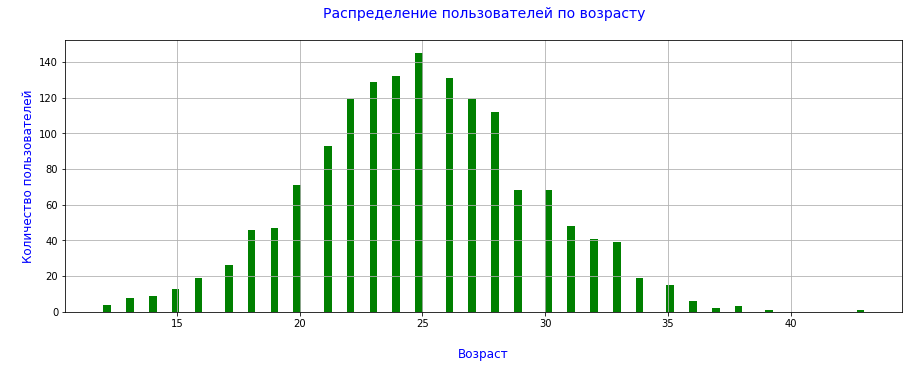

In [21]:
users['age'].hist(
    bins = 100,
    grid = True,
    figsize = (15, 5),
    color = 'green'
)
plt.xlabel('\n'+'Возраст', color = 'blue', fontsize = 12)
plt.ylabel('\n'+'Количество пользователей', color = 'blue', fontsize = 12)
plt.title('Распределение пользователей по возрасту' +'\n', color = 'blue', fontsize = 14);

В нашей выборке преобладают пользователи от 18 до 33 лет. Но есть и несовершеннолетние пользователи и пользователи старше 40 лет

In [22]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Минимальный возраст наших пользователей 12 лет, максимальный - 43 года. Среднее и медиана совпали - 25 лет. Основные значения сосредоточены в диапазоне от 22 до 28 лет

### 3.4. Расстояния, которые пользователь преодолел за одну поездку

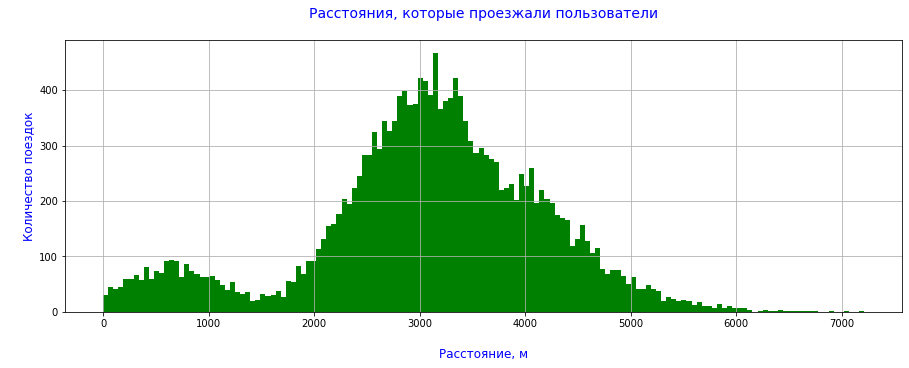

In [23]:
rides['distance'].hist(
    bins = 150,
    grid = True,
    figsize = (15, 5),
    color = 'green'
)
plt.xlabel('\n'+'Расстояние, м', color = 'blue', fontsize = 12)
plt.ylabel('\n'+'Количество поездок', color = 'blue', fontsize = 12)
plt.title('Расстояния, которые проезжали пользователи' +'\n', color = 'blue', fontsize = 14);

Преобладающее количество поездок в диапазоне от 2 до 4,8 км. Но есть и слишком короткие поездки (меньше 1 км)  и экстремально долгие (больше 6 км). 

### 3.5. Продолжительность каждой поездки

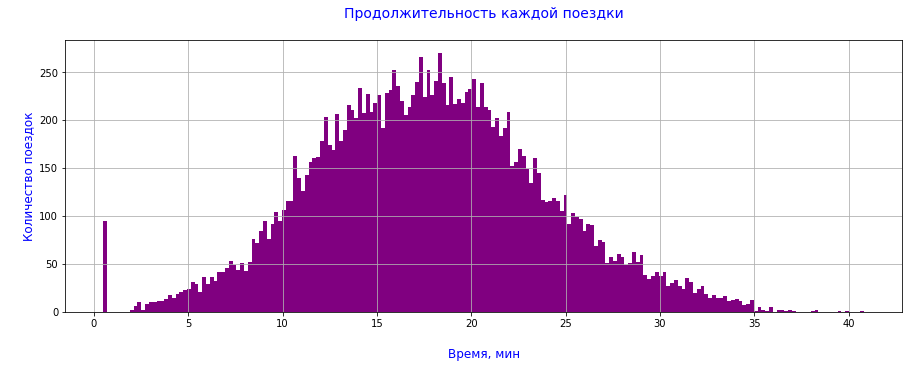

In [24]:
#Построим гистограмму продолжительности каждой поездки
rides['duration'].hist(
    bins = 200,
    grid = True,
    figsize = (15, 5),
    color = 'purple'
)
plt.xlabel('\n'+'Время, мин', color = 'blue', fontsize = 12)
plt.ylabel('\n'+'Количество поездок', color = 'blue', fontsize = 12)
plt.title('Продолжительность каждой поездки' +'\n', color = 'blue', fontsize = 14);

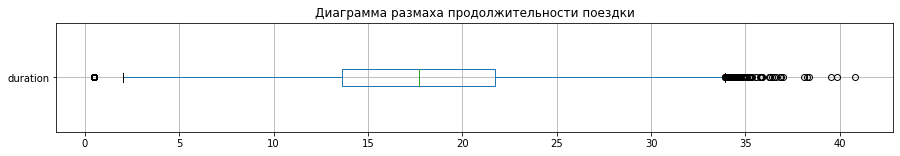

In [25]:
#Построим диаграмму размаха длительности поездок
fig, ax = plt.subplots(figsize = (15,2))
ax = rides[['duration']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха продолжительности поездки');


In [26]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

В наших данных преобладают поездки от 13 до 21 минуты. Есть экстремально короткие поездки  меньше 1 минуты и есть поездки длительностью 40 минут. Среднее значение и медиана примерно совпали и составили 17,6-17,8 минуты


В ходе исследовательского анализа данных мы посмотрели распределение пользователей по городам и возрастам: в нашей выборке есть представители из восьми городов России, преобладают пользователи в возрасте от 18 до 33 лет. Данные о пользователях с подпиской и без подписки представлены без большого перекоса в какую-либо сторону, но с преобладанием доли пользователей без подписки, это нужно будет учесть при последующей проверке гипотез. Данные о дительности и дальности поездок так же представлены достаточно равномерно и готовы к дальнейшему анализу.

## 4. Объединение данных

### 4.1. Создание общей сводной таблицы

Объединим таблицы users и rides в одну - по столбцу 'user_id'

In [27]:
rides.shape

(18068, 5)

In [28]:
data_merge = rides.merge(users, on = 'user_id', how = 'left')
data_merge.tail(10)

,user_id,distance,duration,date,month,name,age,city,subscription_type
18058,1534,195.447469,6.469074,2021-06-11,6,Альберт,25,Краснодар,free
18059,1534,3214.021065,18.343604,2021-06-18,6,Альберт,25,Краснодар,free
18060,1534,3644.708038,20.289416,2021-08-08,8,Альберт,25,Краснодар,free
18061,1534,3977.744996,26.916544,2021-08-20,8,Альберт,25,Краснодар,free
18062,1534,4928.173852,22.560373,2021-09-13,9,Альберт,25,Краснодар,free
18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free
18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free
18067,1534,2371.711192,15.893917,2021-12-29,12,Альберт,25,Краснодар,free


In [29]:
data_merge.shape

(18068, 9)

### 4.2. Создание таблицы пользователей с подпиской

In [30]:
data_subs_ultra = data_merge.query('subscription_type == "ultra" ')
data_subs_ultra.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra


In [31]:
data_subs_ultra.shape

(6500, 9)

Посмотрим на расстояние, которое проезжают пользователи с подпиской

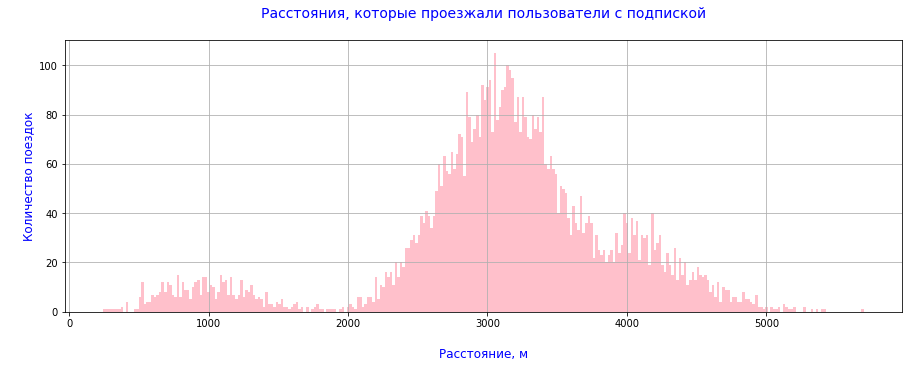

In [32]:
data_subs_ultra['distance'].hist(
    bins = 300,
    grid = True,
    figsize = (15, 5),
    color = 'pink'
)
plt.xlabel('\n'+'Расстояние, м', color = 'blue', fontsize = 12)
plt.ylabel('\n'+'Количество поездок', color = 'blue', fontsize = 12)
plt.title('Расстояния, которые проезжали пользователи с подпиской' +'\n', color = 'blue', fontsize = 14);

Основная масса значений находится в пределах 2800 - 3500 метров. Есть доля расстояний меньше 1 км и больше 5 км

Посмотрим теперь на продолжительность поездок

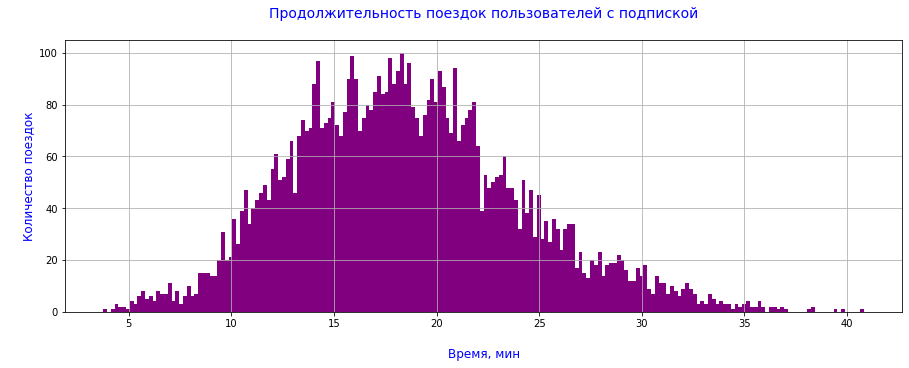

In [33]:
 data_subs_ultra['duration'].hist(
    bins = 200,
    grid = True,
    figsize = (15, 5),
    color = 'purple'
)
plt.xlabel('\n'+'Время, мин', color = 'blue', fontsize = 12)
plt.ylabel('\n'+'Количество поездок', color = 'blue', fontsize = 12)
plt.title('Продолжительность поездок пользователей с подпиской' +'\n', color = 'blue', fontsize = 14);

График похож на нормальное распределение. Пользователи с подпиской в основном берут самокат на срок от 13 до 22 минут.

### 4.3. Создание таблицы пользователей без подписки

In [34]:
data_subs_free = data_merge.query('subscription_type == "free" ')
data_subs_free.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free


In [35]:
data_subs_free.shape

(11568, 9)

Посмотрим на дальность поездок пользователей без подписки

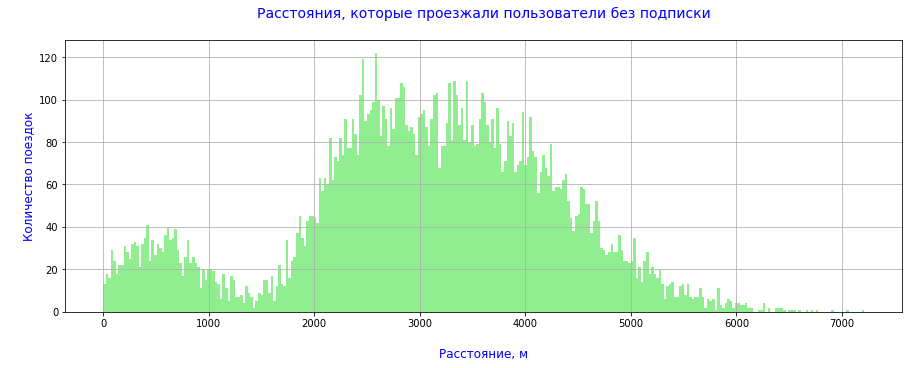

In [36]:
data_subs_free['distance'].hist(
    bins = 300,
    grid = True,
    figsize = (15, 5),
    color = 'lightgreen'
)
plt.xlabel('\n'+'Расстояние, м', color = 'blue', fontsize = 12)
plt.ylabel('\n'+'Количество поездок', color = 'blue', fontsize = 12)
plt.title('Расстояния, которые проезжали пользователи без подписки' +'\n', color = 'blue', fontsize = 14);

Пользователи без подписки проезжают в основном от 2000 до 4500 метров, но у них увеливается количество поездок менее 1000 метров

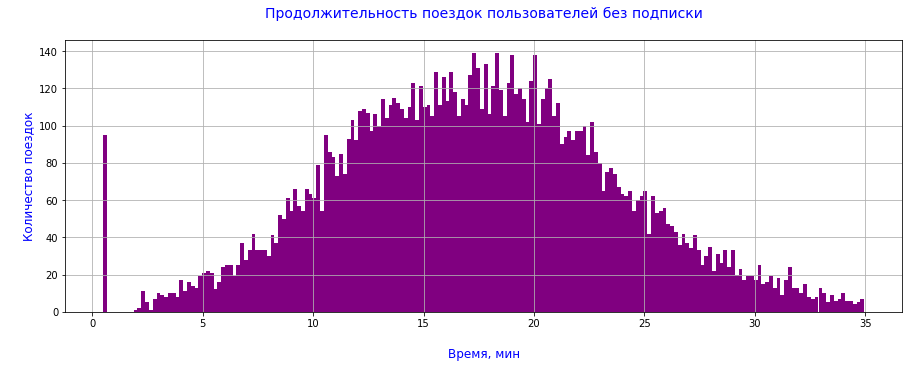

In [37]:
 data_subs_free['duration'].hist(
    bins = 200,
    grid = True,
    figsize = (15, 5),
    color = 'purple'
)
plt.xlabel('\n'+'Время, мин', color = 'blue', fontsize = 12)
plt.ylabel('\n'+'Количество поездок', color = 'blue', fontsize = 12)
plt.title('Продолжительность поездок пользователей без подписки' +'\n', color = 'blue', fontsize = 14);

График похож на нормальное распределение. Пользователи без подписки берут самокат в аренду преимущественно на срок от 12 до 23 минут.

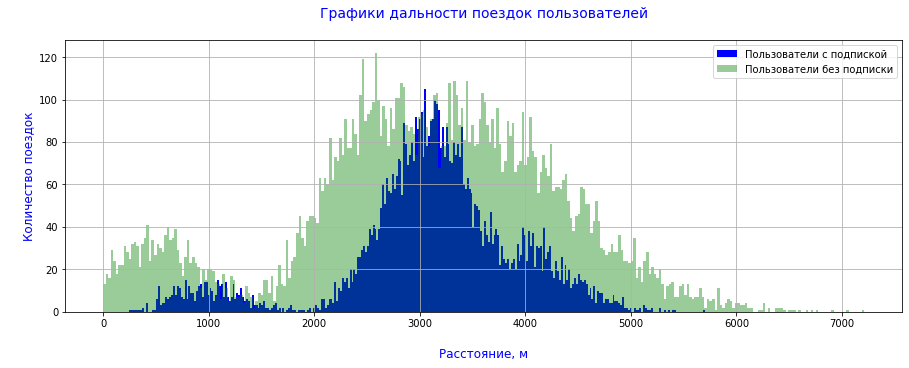

In [38]:
#Совместим графики дальности поездок пользователей с подпиской и без
ax = data_subs_ultra['distance'].hist(
    bins = 300,
    grid = True,
    figsize = (15, 5),
    color = 'blue',
    label = 'Пользователи с подпиской'
)
data_subs_free['distance'].hist(
    bins = 300,
    grid = True,
    figsize = (15, 5),
    color = 'green',
    alpha = 0.4,
    label = 'Пользователи без подписки'
)
ax.legend(loc = 'best')
plt.xlabel('\n'+'Расстояние, м', color = 'blue', fontsize = 12)
plt.ylabel('\n'+'Количество поездок', color = 'blue', fontsize = 12)
plt.title('Графики дальности поездок пользователей' +'\n', color = 'blue', fontsize = 14);

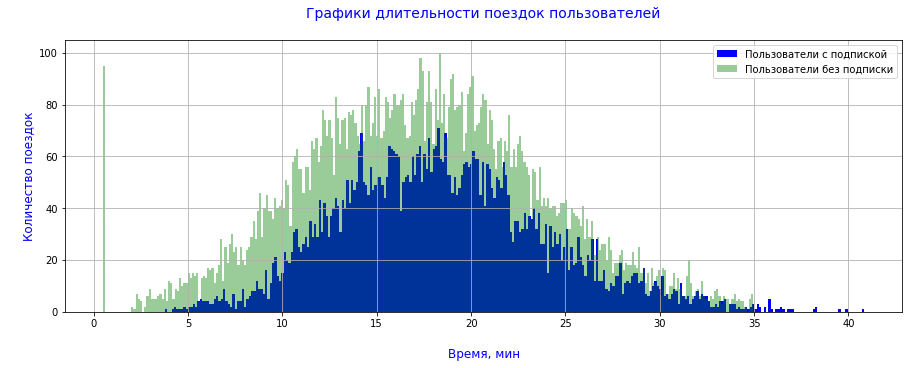

In [39]:
# Совместим графики длительности поездок
ax = data_subs_ultra['duration'].hist(
    bins = 300,
    grid = True,
    figsize = (15, 5),
    color = 'blue',
    label = 'Пользователи с подпиской'
)
data_subs_free['duration'].hist(
    bins = 300,
    grid = True,
    figsize = (15, 5),
    color = 'green',
    alpha = 0.4,
    label = 'Пользователи без подписки'
)
ax.legend(loc = 'best')
plt.xlabel('\n'+'Время, мин', color = 'blue', fontsize = 12)
plt.ylabel('\n'+'Количество поездок', color = 'blue', fontsize = 12)
plt.title('Графики длительности поездок пользователей' +'\n', color = 'blue', fontsize = 14);

По совмещенным графикам дальности и длительности поездок видно, что графики пользователей с подпиской имеют меньший разброс параметров, собраны ближе к центру. Особенно это четко видно на расстоянии, которое проезжали пользователи. Дальность поездок пользователей без подписки в основном сосредоточена в диапазоне от 2000 до 4500 метров, а пользователей с подпиской от 2800 до 3500 м. У пользователей без подписки высокая доля коротких поездок (меньше 1000 метров), а так же растягивается хвост длинных поездок (больше 5000 м). Графики длительности поездок по времени приблизительно совпадают в основных значения от 13 до 23 минут, но мы видим большое количество непродолжительных поездок (меньше 10 минут) у пользователей без подписки.

## 5. Подсчет выручки


In [40]:
# округлим столбец 'duration' до следующего целого числа
data_subs_ultra['duration'] = np.ceil(data_subs_ultra['duration'])
data_subs_ultra.head()

C:\Users\279A~1\AppData\Local\Temp/ipykernel_7368/3682305618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subs_ultra['duration'] = np.ceil(data_subs_ultra['duration'])


,user_id,distance,duration,date,month,name,age,city,subscription_type
0,1,4409.919140,26.0,2021-01-01,1,Кира,22,Тюмень,ultra
1,1,2617.592153,16.0,2021-01-18,1,Кира,22,Тюмень,ultra
2,1,754.159807,7.0,2021-04-20,4,Кира,22,Тюмень,ultra
3,1,2694.783254,19.0,2021-08-11,8,Кира,22,Тюмень,ultra
4,1,4028.687306,27.0,2021-08-28,8,Кира,22,Тюмень,ultra


In [41]:
#Создадим сводную таблицу, по пользователям c подпиской
# в которой посчитаем количество поездок пользователей по месяцам,
#суммарное расстояние и суммарную длительность поездок

data_subs_ultra_pivot = data_subs_ultra.pivot_table(
   index = ['user_id', 'month','subscription_type'],
    values = ['distance','duration'],
    aggfunc = {'distance': ['count', 'sum'], 'duration':'sum'}
).reset_index()
data_subs_ultra_pivot.columns = ['user_id','month','subscription_type','rides', 'union_distance', 'union_duration']
data_subs_ultra_pivot.head()


,user_id,month,subscription_type,rides,union_distance,union_duration
0,1,1,ultra,2,7027.511294,42.0
1,1,4,ultra,1,754.159807,7.0
2,1,8,ultra,2,6723.470560,46.0
3,1,10,ultra,2,5809.911100,32.0
4,1,11,ultra,3,7003.499363,56.0


In [42]:
# Округлим  столбец 'union_distance' до сотых

data_subs_ultra_pivot['union_distance'] = round(data_subs_ultra_pivot['union_distance'], 2)
data_subs_ultra_pivot.head()

,user_id,month,subscription_type,rides,union_distance,union_duration
0,1,1,ultra,2,7027.51,42.0
1,1,4,ultra,1,754.16,7.0
2,1,8,ultra,2,6723.47,46.0
3,1,10,ultra,2,5809.91,32.0
4,1,11,ultra,3,7003.50,56.0


In [43]:
# Округлим столбец 'duration' в таблице с пользователями без подписки
data_subs_free['duration'] = np.ceil(data_subs_free['duration'])
data_subs_free.head()

C:\Users\279A~1\AppData\Local\Temp/ipykernel_7368/1663001305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subs_free['duration'] = np.ceil(data_subs_free['duration'])


,user_id,distance,duration,date,month,name,age,city,subscription_type
6500,700,2515.690719,15.0,2021-01-02,1,Айдар,22,Омск,free
6501,700,846.932642,17.0,2021-02-01,2,Айдар,22,Омск,free
6502,700,4004.434142,21.0,2021-02-04,2,Айдар,22,Омск,free
6503,700,1205.911290,10.0,2021-02-10,2,Айдар,22,Омск,free
6504,700,3047.379435,18.0,2021-02-14,2,Айдар,22,Омск,free


In [44]:
#Создадим сводную таблицу, по пользователям без подписки
# в которой посчитаем количество поездок пользователей по месяцам,
#суммарное расстояние и суммарную длительность поездок

data_subs_free_pivot = data_subs_free.pivot_table(
   index = ['user_id', 'month','subscription_type'],
    values = ['distance','duration'],
    aggfunc = {'distance': ['count', 'sum'], 'duration':'sum'}
).reset_index()
data_subs_free_pivot.columns = ['user_id','month','subscription_type','rides', 'union_distance', 'union_duration']
data_subs_free_pivot.head()

,user_id,month,subscription_type,rides,union_distance,union_duration
0,700,1,free,1,2515.690719,15.0
1,700,2,free,5,13446.659764,89.0
2,700,3,free,1,3798.334905,19.0
3,700,4,free,1,2984.551206,16.0
4,700,6,free,2,5927.650988,29.0


In [45]:
# Округлим столбец 'union_distance' до сотых

data_subs_free_pivot['union_distance'] = round(data_subs_free_pivot['union_distance'], 2)
data_subs_free_pivot.head()

,user_id,month,subscription_type,rides,union_distance,union_duration
0,700,1,free,1,2515.69,15.0
1,700,2,free,5,13446.66,89.0
2,700,3,free,1,3798.33,19.0
3,700,4,free,1,2984.55,16.0
4,700,6,free,2,5927.65,29.0


Добавим столбец с помесячной выручкой. Для этого создадим функцию revenue, которая пройдет по всем строкам наших сводных таблиц, проверит тип подписки и посчитает выручку по нужной формуле

In [46]:
def revenue(df):
    for user in range(len(df)):
    
        if df['subscription_type'] == 'free': 
            revenue = (
                df['rides']*subscriptions.loc[0,'start_ride_price']) + (
                df['union_duration']*subscriptions.loc[0, 'minute_price']) + subscriptions.loc[0, 'subscription_fee']
        elif df['subscription_type'] == 'ultra':
            revenue = (
                df['rides']*subscriptions.loc[1,'start_ride_price']) + (
                df['union_duration']*subscriptions.loc[1, 'minute_price']) + subscriptions.loc[1, 'subscription_fee']
        else:
            revenue = 'ошибка!'
        
        return revenue

    

In [47]:
data_subs_ultra_pivot['revenue'] = data_subs_ultra_pivot.apply(revenue, axis = 1)
data_subs_ultra_pivot.head()

,user_id,month,subscription_type,rides,union_distance,union_duration,revenue
0,1,1,ultra,2,7027.51,42.0,451.0
1,1,4,ultra,1,754.16,7.0,241.0
2,1,8,ultra,2,6723.47,46.0,475.0
3,1,10,ultra,2,5809.91,32.0,391.0
4,1,11,ultra,3,7003.50,56.0,535.0


In [48]:
data_subs_free_pivot['revenue'] = data_subs_free_pivot.apply(revenue, axis = 1)
data_subs_free_pivot.head()

,user_id,month,subscription_type,rides,union_distance,union_duration,revenue
0,700,1,free,1,2515.69,15.0,170.0
1,700,2,free,5,13446.66,89.0,962.0
2,700,3,free,1,3798.33,19.0,202.0
3,700,4,free,1,2984.55,16.0,178.0
4,700,6,free,2,5927.65,29.0,332.0


## 6. Проверка гипотез

### 6.1. Пользователи с подпиской тратят больше времени на поездки

**Для проверки данной гипотезы сформулируем нулевую и альтернативную гипотезы:**

H0: Длительности поездок пользователей с подпиской и без подписки равны

H1: Длительность поездок пользователей с подпиской больше, чем пользователей без подписки

Так как две наши выборки не зависят друг от друга и длительность поездок близка к нормальному распределению, воспользуемся t-тестом для двух выборок, чтобы проверить нашу гипотезу

In [49]:
# Для проверки нашей гипотезы воспользуемся методом T-тест для двух выборок, статистическую значимость возьмем за 0,05
# Так как наши выборки не равны по размеру, equal_var = False
# Так как нас интересует, будет ли длительность поездок пользователей с подпиской больше, чем пользователей без подписки, alternative = 'greater'

alpha = 0.05
result = st.ttest_ind(data_subs_ultra['duration'], data_subs_free['duration'], equal_var = False, alternative = 'greater')
print('p-value:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нулевую гипотезу отвергнуть не получилось')

p-value: 1.1814679253701353e-36
Отвергаем нулевую гипотезу


Т-тест показал низкий уровень значимости. Можно отвергнуть нулевую гипотезу в пользу альтернативной - длительность поездок пользователей с подпиской больше, чем пользователей без подписки.

### 6.2. Проверка дальности поездок

**Для проверки данной гипотезы сформулируем нулевую и альтернативную гипотезы:**

H0: Дальность поездок пользователей с подпиской равна 3130 метров

H1: Дальность поездок пользователей с подпиской больше 3130 метров

Для проверки этой гипотезы воспользуемся t-тестом, уровень статистической значимости зададим 0,05

In [50]:
alpha = 0.05
result = st.ttest_1samp(
    a=data_subs_ultra['distance'],
    popmean = 3130, 
    alternative = 'greater')

print('p-value:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нулевую гипотезу отвергнуть не получилось')


p-value: 0.9195368847849785
Нулевую гипотезу отвергнуть не получилось


Т-тест показал, достаточно высокий уровень значимости, значит мы не можем отвергуть нулевую гипотезу: дальность поездок пользователей с подпиской примерно равна 3130 м.

### 6.3. Проверяем, будет ли выручка от пользователей с подпиской больше, чем от пользователей без подписки

**Сформулируем нулевую и альтернативную гипотезы:**

H0: Выручки от пользователей с подпиской и без подписки равны

H1: Выручка от пользователей с подпиской больше, чем от пользователей без подписки

Для проверки этой гипотезы воспользуемся t-тестом, уровень статистической значимости зададим 0,05


In [51]:
alpha = 0.05
result = st.ttest_ind(data_subs_ultra_pivot['revenue'], data_subs_free_pivot['revenue'], equal_var = False, alternative = 'greater')
print('p-value:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нулевую гипотезу отвергнуть не получилось')

p-value: 8.874140893976874e-40
Отвергаем нулевую гипотезу


Т-тест показал, низкий уровень значимости, значит у нас есть основания отвергнуть нулевую гипотезу в пользу альтернативной. Средняя выручка от пользователей с подпиской больше, чем от пользователей без подписки

### 6.4. Проверить, изменилось ли количество обращений в техподдержку после обновления работы серверов

H0: Количество обращений в техподдержку после обновления серверов равно количеству обращений до обновления (не изменилось)

H1: Количество обращений в техподдержку после обновления серверов значимо снизилось.

Для ответа на данный вопрос нужно будет воспользоваться t-teстом для двух зависимых (парных) выборок: scipy.stats.ttest_rel(). Так как наша генеральная совокупность осталась прежней, нам нужно проверить среднее количество обращений до обновления и после. И так как нас интересует, снизилось ли среднее количество обращений после обновления - это левый 'хвост', то есть alternative = 'less'. Уровень статистической значимости лучше выбрать 0,01 -  раз нас интересует значительное снижение.

## 7. Распределения

### 7.1. Выяснить, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была не более 5%

 Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 
100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж.

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10% пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%.

Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

Данную задачу можно представить биноминальным распределением, где p = 0.1. Пользователь либо продлевает подписку, либо нет. Количество промокодов (n) не известно - будем подбирать его по графику биноминального распределения.


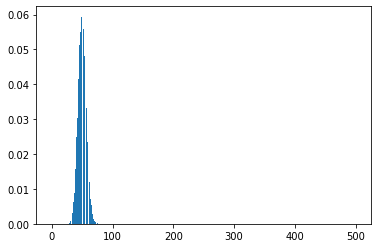

In [52]:
from math import sqrt
from scipy.stats import binom, norm

p = 0.1
n = 500

distr = []

for k in range(0, n + 1):
    current_value = binom.pmf(k, n, p)
    distr.append(current_value)
    
plt.bar(range(0, n + 1), distr);

При n=500 вероятность получить 100 подписок ничтожно мала, увеличим n до 1000

c:\users\полицинский роман\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_discrete_distns.py:78: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


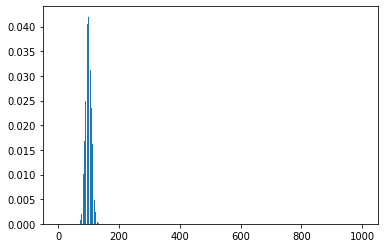

In [53]:
p = 0.1
n = 1000

distr = []

for k in range(0, n + 1):
    current_value = binom.pmf(k, n, p)
    distr.append(current_value)
    
plt.bar(range(0, n + 1), distr);


Судя по графику, при n=1000 вероятность получить меньше 100 подписок приближается к 5%.

Проверим наше предположение с помощью метода cdf(). 

Для этого сначала проверим, можем ли мы аппроксимировать наше биноминальное распределение нормальным, чтобы применить метод cdf().
За математическое ожидание и стандартное отклонение нормального распределения возмем мат. ожидание и ст. отклонение биноминального распределения.
Посмотрим, лежит ли промежуток математическое ожидание плюс/минус три стандартных отклонения в промежутке [0, n].



In [54]:
sigma = sqrt(n * p * (1 - p))
mu = n*p
left =  mu - 3*sigma
right = mu + 3*sigma

if left >= 0 and right <= n:
    print('Условие выполняется, аппроксимация возможна')
else:
    print('Условие не выполняется, аппроксимацию делать нельзя')

Условие выполняется, аппроксимация возможна


Аппроксимация возможна, поэтому воспользуемся методом cdf() для более точного расчета вероятности не выполнить план на 5%

In [55]:
distr = st.norm(mu, sigma)
result = distr.cdf(100)
print(f'При количестве промокодов равном {n} вероятность не выполнить план равна примерно {result}')

При количестве промокодов равном 1000 вероятность не выполнить план равна примерно 0.5


При вероятности того, что подписку продлевают 10% пользователей, отделу маркетинга необходимо разослать как минимум 1000 листовок, для того, чтобы вероятность не выполнить план получить 100 подписок была примерно 5%

### 7.2. Оценить вероятность того, что уведомления откроют не более 399,5 тыс пользователей

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40% получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Эту ситуацию так же можно описать биноминальным распределением. 
Проверим, можно ли аппроксимировать это биноминальное распределение нормальным.


In [56]:
# задаём параметры биномиального распределения
n = 1000000
p = 0.4

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

# выводим, выполняется ли наше условие аппроксимации:
# лежит ли mu ± 3 sigma в промежутке от 0 до n:
if (mu - (3 * sigma) >= 0) and ((mu + (3 * sigma) <= n)):
    print('Условие выполняется')
else:
    print('Условие не выполняется')

Условие выполняется


Аппроксимируем наше биноминальное распределение нормальным и построим его график

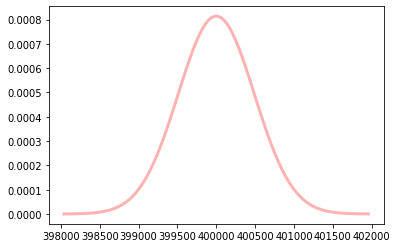

In [57]:
# зададим функцию, которая выдаёт <num> чисел,
# равномерно распределённых от <start> до <stop>
# для визуализации нормального распределения
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result

# границы промежутка, в котором будем строить аппроксимацию -
# от n*p минус 4 ст.отклонения бином.распределения
# до n*p плюс 4 ст.отклонения бином.распределения
left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))
 
# рисуем график нормального распределения:
# получим список из 100 чисел от left до right
x = linspace(left, right, 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=3, alpha=0.3)
 
# зададим подписи по оси x в пределах ± 3 ст.отклонений от мат.ожидания
x_ticks = list(range(int(mu - 3 * sigma), int(mu + 3 * sigma), 1))

plt.show()


In [58]:
distr = st.norm(mu, sigma)
result = round(distr.cdf(399500),2)
print(f'Вероятность, что push-уведомление откроют не более 399 500 пользователей составляет {result}')

Вероятность, что push-уведомление откроют не более 399 500 пользователей составляет 0.15


C помощью аппроксимации биноминального распределения нормальным мы подсчитали вероятность того, что  push-уведомление откроют не более 399 500 пользователей составляет 15%

## Вывод

В ходе нашего исследования была проведена работа с предоставленными данными.

1. Данные были проверены на наличие пропусков, дубликатов.
Повторяющиеся строки были удалены.

2. Был проведен исследовательский анализ данных.
  - Мы выяснили, что в нашей выборке представлено восемь различных городов, данные между ними распределены примерно одинаково
  - Число пользователей с подпиской в нашей выборке немного меньше, чем пользователей без подписки, то есть две наши страты численно не одинаковы
  - Распределение пользователей по возрасту в нашей выборке близко к нормальному. Преобладают пользователи в возрасте от 18 до 33 лет
  - В  нашей выборке преобладают поездки от 2 до 4,8 км
  - Длительность поездок в основном от 10 до 25 минут.
3. В ходе работы для дальнейшей проверки гипотез были созданы сводные таблицы по пользователям с подпиской и без подписки, посчитана месячная выручка по каждому пользователю, составлены графики дальности и длительности поездок по каждой группе пользователей.
4. Основываясь на результатах проведенного исследования мы ответили на следующие вопросы:
  - Длительность поездок пользователей с подпиской больше, чем пользователей без подписки.
  - Пользователи с подпиской в среднем проезжают расстояние около 3130 метров.
  - Пользователи с подпиской в среднем приносят больше выручки, чем пользователи без подписки.
  
Исходя из полученных данных можно сказать, что сервису выгодно работать над дальнейшим увеличением пользователей с подпиской.

5. В ходе работы были составлены графики распределения и подсчитана вероятность заданных событий:
    - При вероятности того, что подписку продлевают 10% пользователей, отделу маркетинга необходимо разослать как минимум 1000 листовок, для того, чтобы вероятность не выполнить план получить 100 подписок была примерно 5%
    - Вероятность того, что push-уведомление откроют не более 399 500 пользователей составляет 15%
  

